# Project Title:
# Diwali Sales Data Analysis


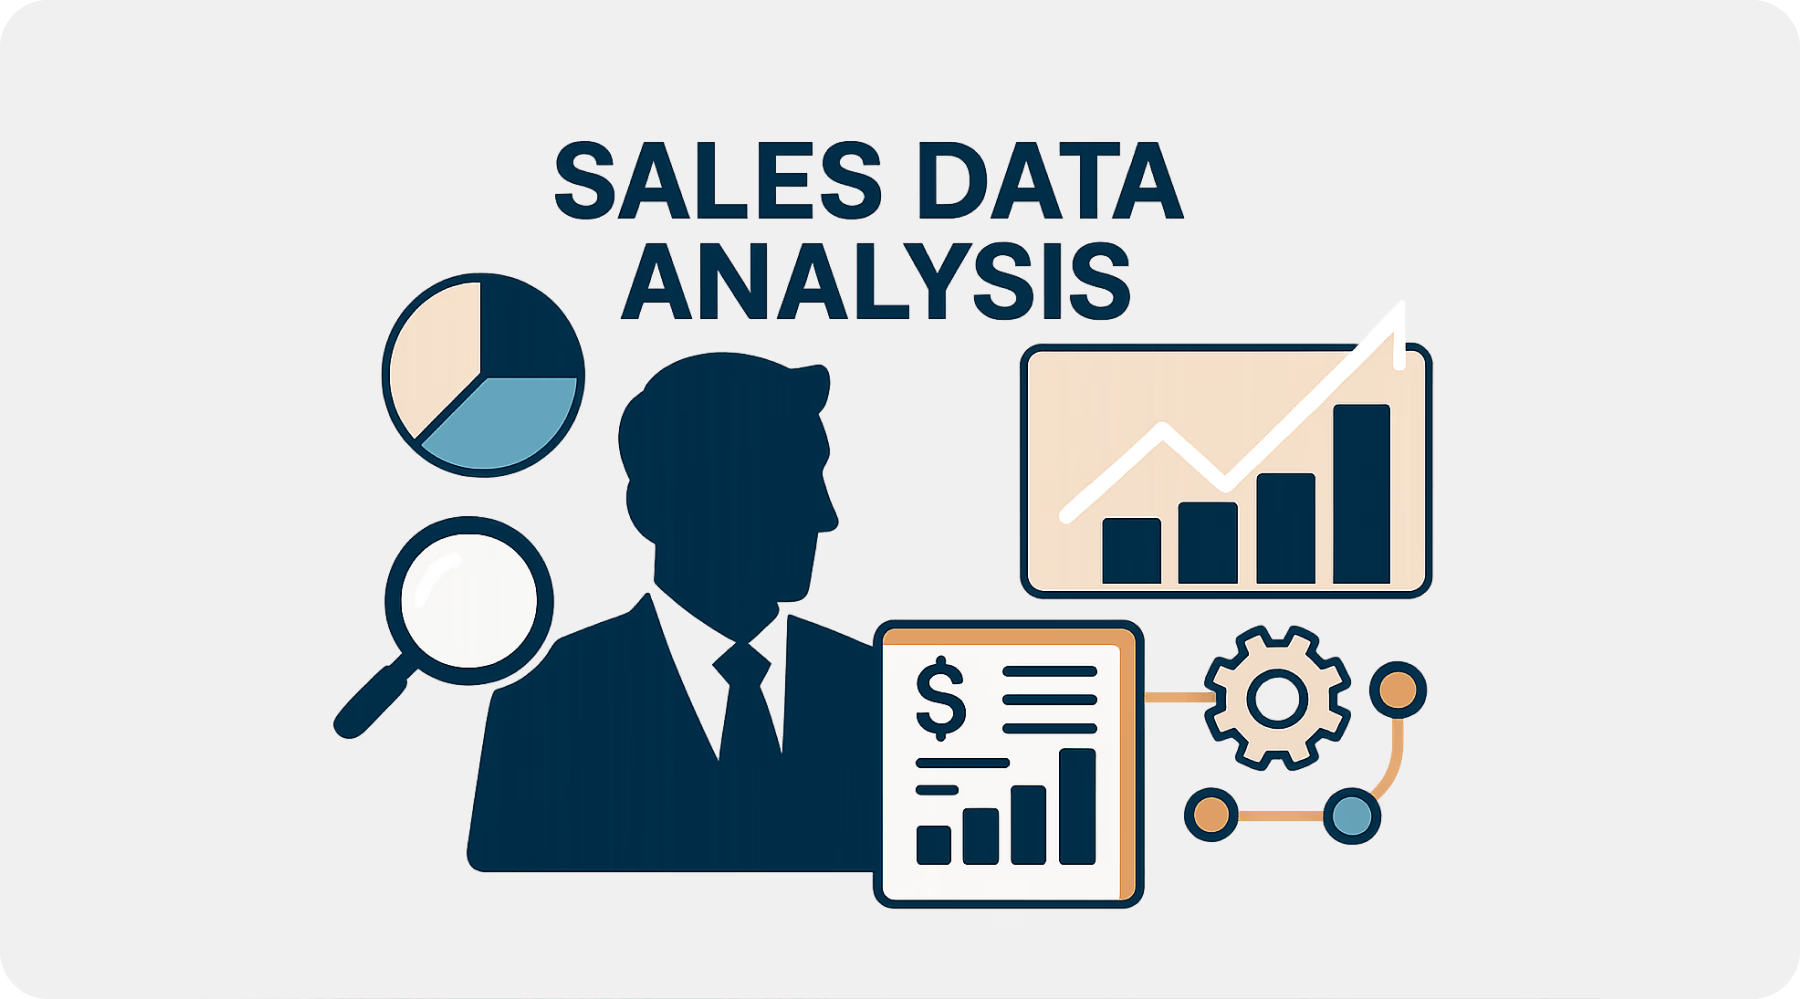

# Introduction:
The purpose of this project is to analyze Diwali sales data to understand customer purchasing behavior and identify the factors that influence sales performance. By examining demographic information, product categories, and total purchase amounts, this analysis helps uncover important trends and insights. These insights can be valuable for improving marketing strategies, targeting the right customer groups, and making informed business decisions for future festive season campaigns.

# Objectives:
To clean and preprocess the Diwali sales dataset for accurate analysis.
To study customer demographics such as age, gender, occupation, and state.
To identify top-performing product categories and analyze purchase trends.
To understand customer spending behavior during the Diwali festive season.
To extract meaningful insights that can help businesses optimize their sales strategies.

# Problem-Solving Approach:
Data Loading & Understanding:
Import the dataset, view its structure, and identify missing or inconsistent values.
Data Cleaning:
Remove null values, correct data types, handle duplicates, and prepare the dataset for analysis.
Exploratory Data Analysis (EDA):
Analyze demographic features (age, gender, state, occupation).
Visualize purchase patterns using charts and graphs.
Identify which customer groups contribute the most to sales.
Explore which product categories and orders show high sales volume.
Insights & Interpretation:
Summarize discoveries from the analysis—highlighting which customers spend more, which categories perform best, and how trends can benefit business decisions.


In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as yp
from sklearn.preprocessing import LabelEncoder

Import All the Required Libraries 1.NumPy – A Python library for fast numerical computing using powerful multidimensional arrays. 2.Pandas – A data-analysis library that provides easy-to-use data structures like DataFrames for handling tabular data. 3.Matplotlib – A plotting library for creating static, animated, and interactive visualizations in Python. 4.Seaborn – A high-level statistical visualization library built on Matplotlib for making attractive and informative plots easily.ydata_profiling:YData Profiling is a tool that automatically generates detailed exploratory data analysis reports with just one line of code.LabelEncoder from scikit-learn converts categorical text labels into numeric values for machine-learning models.

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding="latin-1")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#### 1.I loaded the CSV file using pd.read_csv("Diwali Sales Data.csv", encoding="latin-1").
2.The encoding specifies how characters are stored in the file so Python can read them correctly.
3.I used it to prevent errors like UnicodeDecodeError when the file contains special characters.
4. df.head show the first rows

✅ Column Descriptions
1. User_ID

Type: Likely integer

A unique ID assigned to each customer.

2. Cust_name

Type: Object (string)

Contains the name of the customer.

3. Product_ID

Type: Object (string)

Unique identifier for each product ordered.

4. Gender

Type: Object (Male/Female)

Shows the gender of the customer.

5. Age Group

Type: Object (categorical)

Shows age categories like "18–25", "26–35", "36–45".

6. Age

Type: Integer

Numerical age of the customer.

7. Marital_Status

Type: Integer or object

Usually 0 = Unmarried, 1 = Married.

8. State

Type: Object

Name of the state the customer belongs to.

9. Zone

Type: Object

Region classification such as North, South, East, West.

10. Occupation

Type: Object

Customer profession (Engineer, Student, Homemaker, etc.).

11. Product_Category

Type: Object

Category of the purchased product (Clothing, Electronics, etc.).

12. Orders

Type: Integer

Number of units/items ordered.

13. Amount

Type: Float or integer

Money spent on the order (final billing amount).

14. Status

Type: Object

Indicates order status (Completed/Pending/Cancelled).
Some datasets have only "Delivered".

15. unnamed1

Type: Unknown / mostly empty

An extra column created accidentally during CSV export.

Should be dropped during cleaning.

# Data cleaning 

In [3]:
#The df.shape attribute is used to display the dimensions of the DataFrame, indicating the total number of rows and columns it contains.

df.shape

(11251, 15)

In [4]:
#The df.info() method provides a concise summary of the DataFrame, including column names, data types, non-null value counts, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#The Status and unnamed1 columns, which contained no meaningful data, were removed from the DataFrame to enhance data cleanliness and usability.

df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [6]:
#The presence of missing values in the DataFrame was assessed by calculating the total number of null values in each column.
#Check the number of null values in each column of the DataFrame.
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# Calculate the total number of duplicate rows in the DataFram# Remove duplicate rows from the DataFrame
df.duplicated().sum()

np.int64(8)

In [8]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Verify that no duplicate rows remain
df.duplicated().sum()


np.int64(0)

In [9]:
# Remove rows containing null values
# inplace=True makes the changes permanent

df.dropna(inplace=True)

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084982
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


The df.describe() function in pandas gives a statistical summary of the numerical columns in a dataset.

It shows:
count – number of non-missing values
mean – average value
std – standard deviation
min – minimum value
25%, 50%, 75% – quartiles
max – maximum value

In [11]:
# 12 rows were removed due to null values
# The DataFrame now contains no missing value
df.shape
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
# Convert the 'Amount' column from float to integer
df["Amount"] = df["Amount"].astype("int")

# Verify the data type of the 'Amount' column
df["Amount"].dtypes

dtype('int64')

# Exploratory Data Analysis

# Gender-Based Analysis of Buyers and Purchasing Power


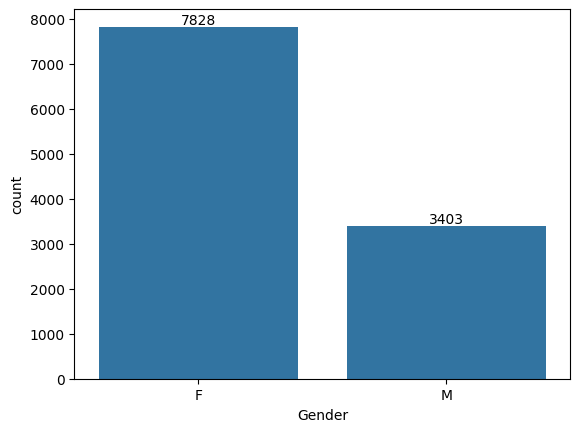

In [13]:
CP = sns.countplot(x = "Gender",data = df)

for bars in CP.containers:
    CP.bar_label(bars)


This code generates a count plot to visualize the frequency of each category in the Gender column of the DataFrame.
The plot object is stored in the variable CP to allow further customization.
A loop iterates over each bar container in the plot, and the bar_label method adds numerical labels on top of each bar.
This approach provides a clear, easily interpretable visualization of the gender distribution in the dataset.

<Axes: xlabel='Gender', ylabel='Amount'>

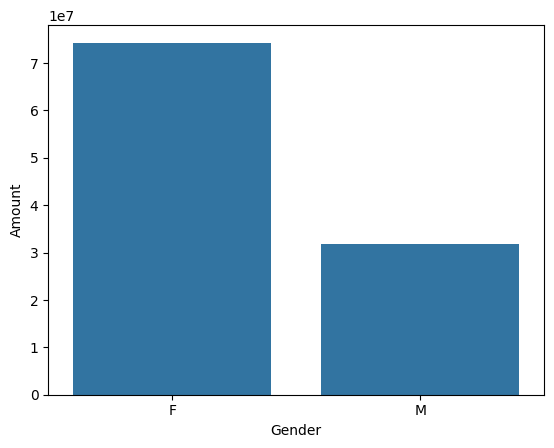

In [14]:
sales_gen = df.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.barplot(x = "Gender" , y = "Amount" ,data = sales_gen)

This code calculates the total sales amount for each gender by grouping the DataFrame on the Gender column.
The Amount values are summed, and the results are sorted in descending order to identify the highest sales contributions.
A bar plot is then created using Seaborn to visualize the total sales per gender.
This visualization helps in quickly comparing sales performance across different gender categories.

**From the graph, it is evident that the majority of buyers are female, and their total purchasing power surpasses that of male buyers.**


# Number of Buyers by Age Group and Gender

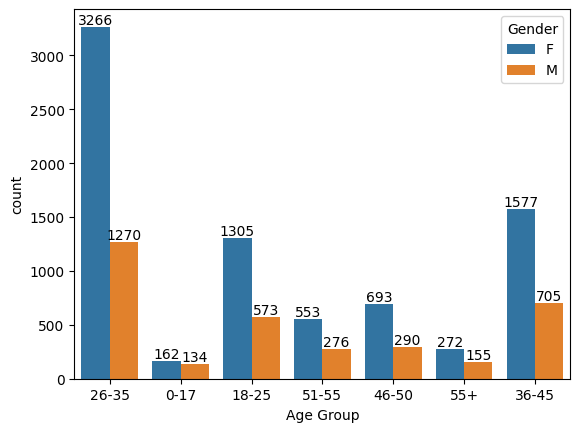

In [15]:
CP = sns.countplot(data = df,x = "Age Group",hue = "Gender")

for bars in CP.containers:
    CP.bar_label(bars)

This code creates a count plot to visualize the distribution of buyers across different Age Group categories, with bars colored by Gender.
The hue="Gender" parameter separates male and female counts within each age group.
A loop iterates over each bar container, and bar_label adds numeric labels on top of the bars for clarity.
This visualization helps to compare the number of male and female buyers within each age group.

<Axes: xlabel='Age Group', ylabel='Amount'>

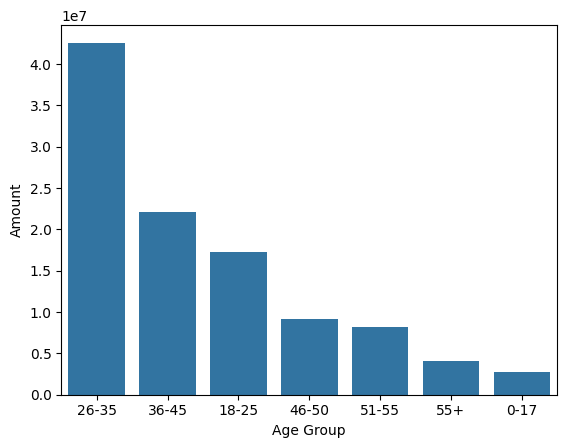

In [16]:
sales_age = df.groupby(["Age Group"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.barplot(x = "Age Group",y = "Amount",data = sales_age)

This code calculates the total sales amount for each Age Group by grouping the DataFrame and summing the Amount values.
The results are sorted in descending order to highlight the age groups contributing the most to sales.
A bar plot is created using Seaborn to visualize total sales across different age groups.
This visualization allows for quick comparison of purchasing power among various age groups.

**The graph indicates that females aged 26 to 35 constitute the largest segment of buyers.**

# Number of Orders in Each State


<Axes: xlabel='State', ylabel='Orders'>

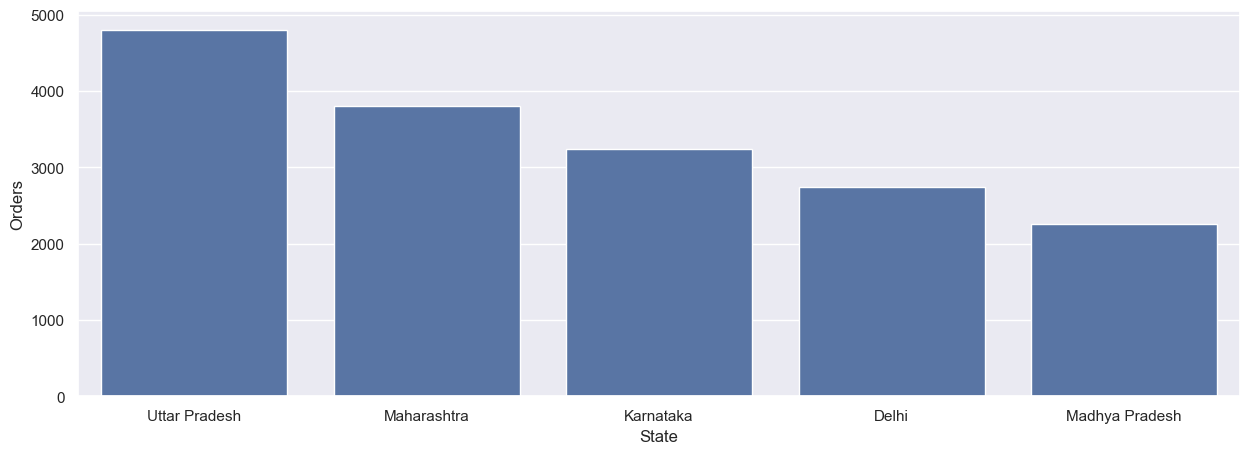

In [17]:
sales_state = df.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by = "Orders",ascending = False).head()
sns.set(rc ={"figure.figsize":(15,5)})
sns.barplot(data = sales_state,x = "State",y = "Orders")

from above graph we can see that most of the orders are coming from utterpradesh

Explanation of the code:
1. `df.groupby(["State"], as_index=False)["Orders"].sum()`  
    - Groups the DataFrame `df` by the "State" column.  
    - For each state, it calculates the total sum of the "Orders" column.  
    - `as_index=False` ensures "State" remains a column in the result, not an index.  
2. `.sort_values(by="Orders", ascending=False)`  
    - Sorts the resulting DataFrame in descending order based on the total "Orders" per state,  
      so states with the highest orders come first.  
3. `sns.set(rc={"figure.figsize": (20, 10)})`  
    - Sets the default size of the plot to 20 inches wide and 10 inches tall for better visibility.  
4. `sns.barplot(data=sales_state, x="State", y="Orders")`  
    - Creates a bar plot with Seaborn, where the x-axis shows the states,  
      and the y-axis shows the total number of orders for each state.  
    - This visualizes the total orders by state in descending order.  


# Number of Orders by Gender and Marital Status

<Axes: xlabel='Marital_Status', ylabel='Amount'>

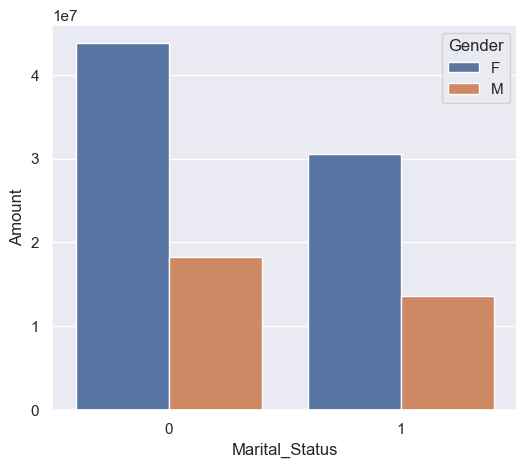

In [18]:
sales_marr = df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.set(rc = {"figure.figsize":(6,5)})
sns.barplot(data = sales_marr,x = "Marital_Status",y = "Amount",hue = "Gender")


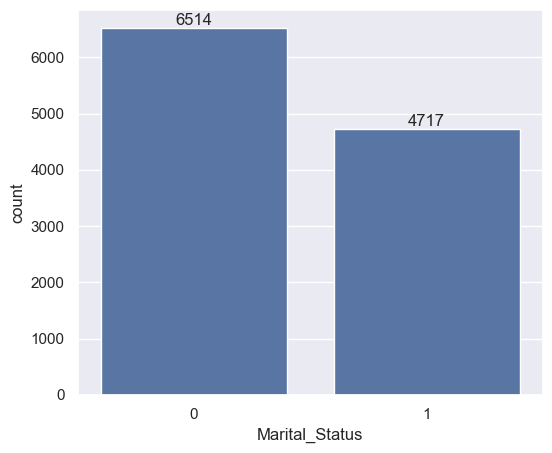

In [19]:
CP = sns.countplot(data = df,x = "Marital_Status")
sns.set(rc = {"figure.figsize":(6,5)})

for bars in CP.containers:
    CP.bar_label(bars)

From the above graph we can see that most of the buyers are married (women) and they have high purchasing power

In [20]:
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,0,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,0,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,0,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,1,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,1,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In this step, we convert the categorical variable `Gender` into numerical values using Label Encoding

- `LabelEncoder` from `sklearn.preprocessing` is used.
- The `fit_transform()` method assigns a unique integer to each category in the `Gender` column.
- This transformation is necessary because many machine learning algorithms require numerical input.  

After encoding, we can see the updated DataFrame using `df.head()`.

# 3D Scatter Plot of Age, Orders, and Purchase Amount

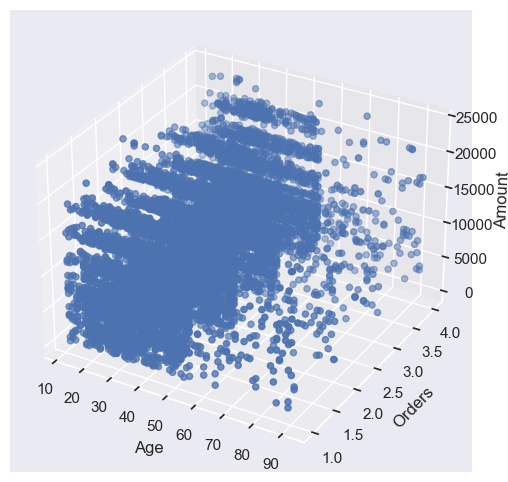

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6)) 
ax = fig.add_subplot(111, projection='3d')

ax.scatter( df['Age'], df['Orders'], df['Amount'] )

ax.set_xlabel('Age') 
ax.set_ylabel('Orders') 
ax.set_zlabel('Amount')

plt.show()

This 3D scatter plot shows the relationship between customer age, number of orders placed, and total purchase amount during the Diwali sales period.

In [22]:
pro = yp.ProfileReport(df,title="diwali sales data report")
pro.to_file(output_file="TD.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 181.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Profiling Report

We generated a profiling report for the dataset using **ydata-profiling**.  
It includes summary statistics, distributions, correlations, and missing value analysis.  
The report is saved as `TD.html` for interactive exploration in a browser.

# Conclusion:

The Diwali sales data analysis revealed clear purchasing trends across gender, age groups, occupations, and states.
Female customers were found to contribute the highest share of total purchases.
The 26–35 age group emerged as the most active buyers during the festive season.
Top product categories and high-spending states were identified, helping pinpoint strong market segments.
Overall, the insights can guide businesses in optimizing marketing strategies and improving festive-season sales performance.